In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.decomposition import PCA
# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")


In [6]:
import warnings
# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data=pd.read_csv('Customers.csv')
data=data.drop('Profession',axis=1)
l=LabelEncoder()
data['Gender']=l.fit_transform(data['Gender'])
data.head()


,CustomerID,Gender,Age,Annual_Income($),Spending_Score,Work_Experience,Family_Size
0,1,1,19,15000,39,1,4
1,2,1,21,35000,81,3,3
2,3,0,20,86000,6,1,1
3,4,0,23,59000,77,0,2
4,5,0,31,38000,40,2,6


In [3]:
data.isna().sum()

CustomerID          0
Gender              0
Age                 0
Annual_Income($)    0
Spending_Score      0
Work_Experience     0
Family_Size         0
dtype: int64

In [4]:
data.dtypes

CustomerID          int64
Gender              int32
Age                 int64
Annual_Income($)    int64
Spending_Score      int64
Work_Experience     int64
Family_Size         int64
dtype: object

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_

Text(0, 0.5, 'Error')

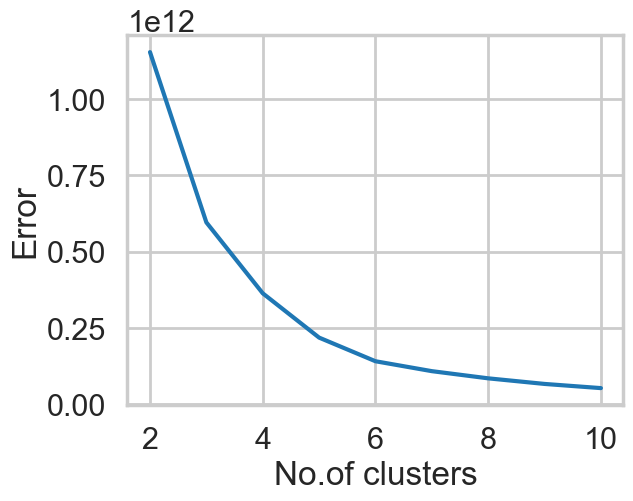

In [7]:
k=list(range(2,11))
y=[]
for i in k:
    km=KMeans(n_clusters=i,random_state=1)
    km.fit(data)
    labels=km.labels_
    y.append(km.inertia_)
plt.plot(k,y)
plt.xlabel('No.of clusters')
plt.ylabel('Error')

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Text(0, 0.5, 'size')

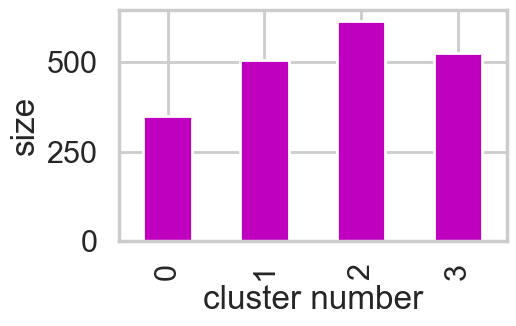

In [10]:
plt.figure(figsize=(5,3))
cluster=KMeans(n_clusters=4,random_state=2)
data['cluster']=cluster.fit_predict(data)
data.cluster.value_counts().sort_index().plot(kind='bar',color='m')
plt.xlabel('cluster number')
plt.ylabel('size')


C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Text(0, 0.5, 'size')

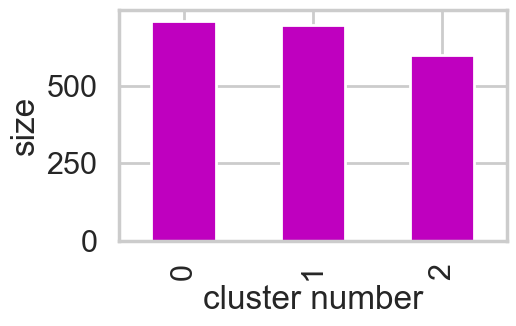

In [12]:
plt.figure(figsize=(5,3))
cluster=KMeans(n_clusters=3,random_state=2)
data['cluster']=cluster.fit_predict(data)
data.cluster.value_counts().sort_index().plot(kind='bar',color='m')
plt.xlabel('cluster number')
plt.ylabel('size')

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_

[0.6177267005150705, 0.5566941791863887, 0.5308427277354965, 0.5586727988911331, 0.5678808753900666, 0.545451464610016, 0.5342628238302698, 0.5464573069091586, 0.5490046585992784]


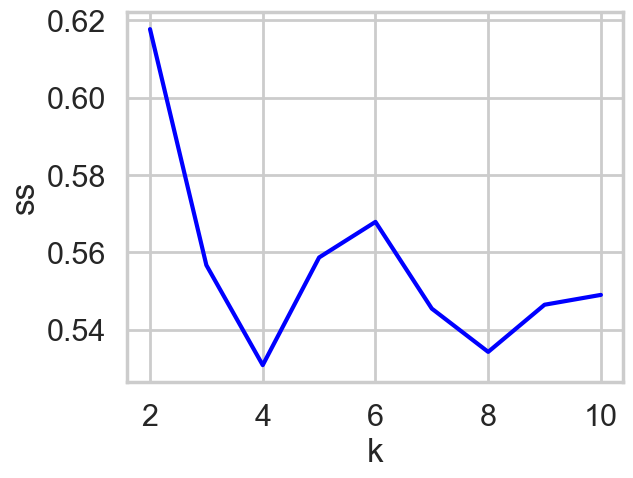

In [13]:
k=list(range(2,11))
ys=[]
for i in k:
    km=KMeans(n_clusters=i,random_state=2)
    km.fit(data)
    labels=km.labels_
    ys.append(silhouette_score(data,labels))

plt.plot(k,ys,color='b')
plt.xlabel('k')
plt.ylabel('ss')
print(ys)

# Building KMeans

In [15]:
from sklearn.cluster import KMeans
clust=KMeans(n_clusters=3)
clust.fit(data)

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=3)

In [16]:
clust.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [17]:
#Performance measure
from sklearn.metrics import silhouette_score
labels=clust.labels_
print(labels,len(labels))
print('Silhouette Score:\t',silhouette_score(data,labels))

[1 1 0 ... 0 2 0] 2000
Silhouette Score:	 0.5566941791863887


In [18]:
clust.inertia_


595705640503.2355

In [19]:
clust.n_clusters

3

# Lbow curve to find optimum k value

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_

Text(0, 0.5, 'Error')

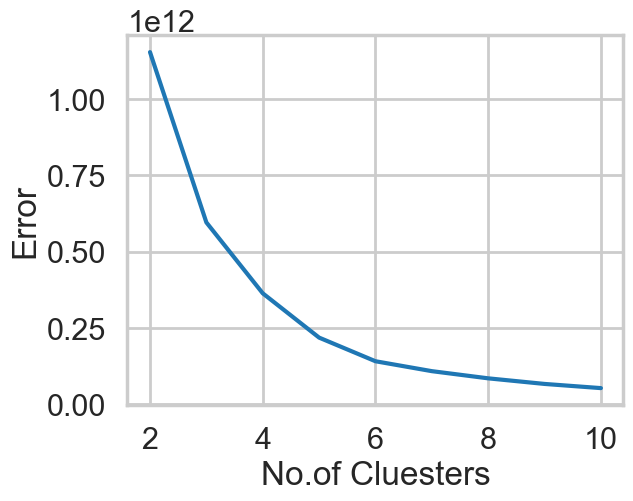

In [20]:
k=list(range(2,11))
y=[]
for i in k:
    km=KMeans(n_clusters=i,random_state=1,init='k-means++')
    km.fit(data)
    labels=km.labels_
    y.append(km.inertia_)

plt.plot(k,y)
plt.xlabel('No.of Cluesters')
plt.ylabel('Error')

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Text(0, 0.5, 'size')

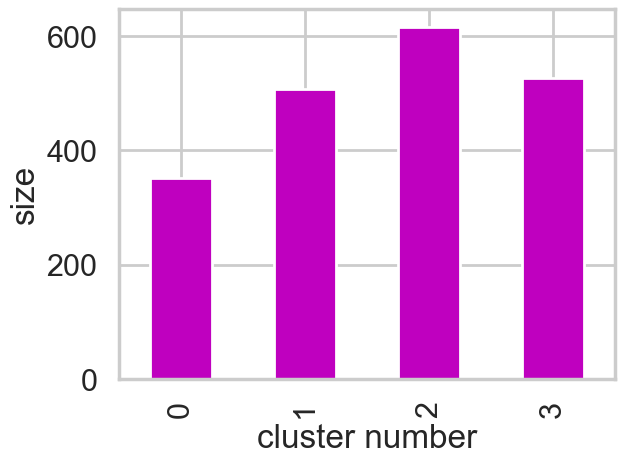

In [21]:
##Elbow point where slope of line is lower =4,5
cluster=KMeans(n_clusters=4,random_state=2)
data['cluster']=cluster.fit_predict(data)
data.cluster.value_counts().sort_index().plot(kind='bar',color='m')
plt.xlabel('cluster number')
plt.ylabel('size')

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_

[0.6177267004080707, 0.556694177881401, 0.5308427297968208, 0.5586727977050141, 0.5678808742070424, 0.5454514640206214, 0.5342628235136437, 0.5464573059469964, 0.5490046585367129]


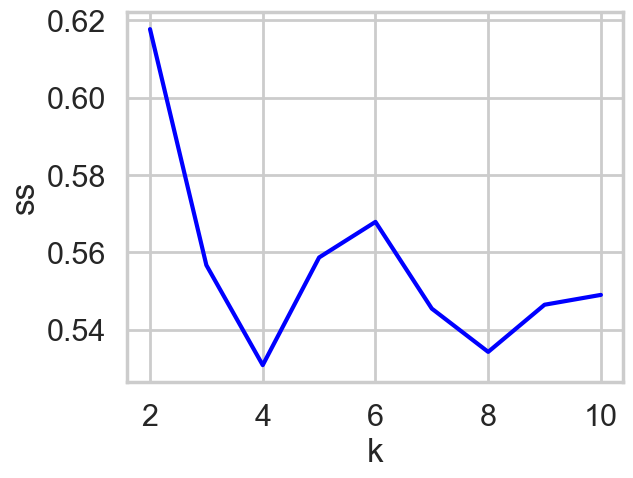

In [22]:
k=list(range(2,11))
ys=[]
for i in k:
    km=KMeans(n_clusters=i,random_state=2)
    km.fit(data)
    labels=km.labels_
    ys.append(silhouette_score(data,labels))

plt.plot(k,ys,color='b')
plt.xlabel('k')
plt.ylabel('ss')
print(ys)


In [23]:
data.head()

,CustomerID,Gender,Age,Annual_Income($),Spending_Score,Work_Experience,Family_Size,cluster
0,1,1,19,15000,39,1,4,0
1,2,1,21,35000,81,3,3,0
2,3,0,20,86000,6,1,1,2
3,4,0,23,59000,77,0,2,0
4,5,0,31,38000,40,2,6,0


In [24]:
df=data.drop('cluster',axis=1)
df.head()

,CustomerID,Gender,Age,Annual_Income($),Spending_Score,Work_Experience,Family_Size
0,1,1,19,15000,39,1,4
1,2,1,21,35000,81,3,3
2,3,0,20,86000,6,1,1
3,4,0,23,59000,77,0,2
4,5,0,31,38000,40,2,6


C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_

[0.6177267007880082, 0.556682917738827, 0.5308427282620393, 0.5586727987153824, 0.5678808754001784, 0.5454514654778174, 0.5342628236747876, 0.5464573067562568, 0.549004658712339]


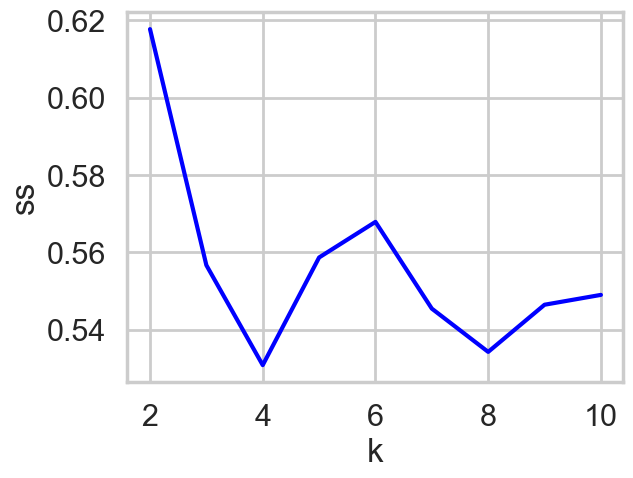

In [25]:
k=list(range(2,11))
ys=[]
for i in k:
    km=KMeans(n_clusters=i,random_state=2)
    km.fit(df)
    labels=km.labels_
    ys.append(silhouette_score(df,labels))

plt.plot(k,ys,color='b')
plt.xlabel('k')
plt.ylabel('ss')
print(ys)

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Text(0, 0.5, 'size')

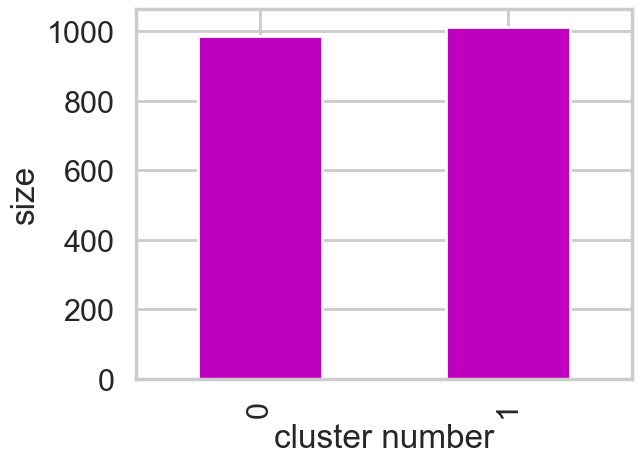

In [26]:
cluster=KMeans(n_clusters=2,random_state=2)
data['cluster']=cluster.fit_predict(data)
data.cluster.value_counts().sort_index().plot(kind='bar',color='m')
plt.xlabel('cluster number')
plt.ylabel('size')